<a href="https://colab.research.google.com/github/limas0209/OBITOS_2021_DF/blob/main/OBITOS_2021_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANALISE DATAFRAME OBTIOS EM 2021
***
##GRUPO:
##Henrique Lima | RM551528
##Guilherme Fazito | RM550539
##Augusto Milreu | RM98245
##Ricardo Akira | RM551447
##Guilherme Doretto | RM99674


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [2]:
obitos_df = pd.read_csv("obitos-2021.csv")

In [3]:
obitos_df

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,11
1,AC,OUTRAS,DOMICILIO,< 9,M,21
2,AC,OUTRAS,HOSPITAL,< 9,F,67
3,AC,OUTRAS,HOSPITAL,< 9,I,4
4,AC,OUTRAS,HOSPITAL,< 9,M,60
...,...,...,...,...,...,...
15669,TO,PNEUMONIA,HOSPITAL,N/I,F,5
15670,TO,PNEUMONIA,HOSPITAL,N/I,I,2
15671,TO,PNEUMONIA,HOSPITAL,N/I,M,2
15672,TO,SEPTICEMIA,HOSPITAL,N/I,F,2


In [4]:
#Obtendo as 5 primeiras linhas do DataFrame
obitos_df.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,11
1,AC,OUTRAS,DOMICILIO,< 9,M,21
2,AC,OUTRAS,HOSPITAL,< 9,F,67
3,AC,OUTRAS,HOSPITAL,< 9,I,4
4,AC,OUTRAS,HOSPITAL,< 9,M,60


In [5]:
#Obtendo as 5 ultimas linhas do DataFrame
obitos_df.tail()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
15669,TO,PNEUMONIA,HOSPITAL,N/I,F,5
15670,TO,PNEUMONIA,HOSPITAL,N/I,I,2
15671,TO,PNEUMONIA,HOSPITAL,N/I,M,2
15672,TO,SEPTICEMIA,HOSPITAL,N/I,F,2
15673,TO,SEPTICEMIA,HOSPITAL,N/I,M,1


#Estatística Descritiva DataFrame


In [6]:
#Realizando uma analise descritiva do DataFrame
obitos_df.describe()

,total
count,15674.000000
mean,107.461018
std,508.835150
min,1.000000
25%,2.000000
50%,6.000000
75%,36.000000
max,14166.000000


#Estatística Descritiva "uf"

In [7]:
#Realizando uma estatística descritiva de casos apenas em SP
uf = obitos_df[obitos_df["uf"] == "SP"].describe()
print(uf)

              total
count    980.000000
mean     437.056122
std     1565.265606
min        1.000000
25%        3.000000
50%       13.000000
75%      112.000000
max    14166.000000


In [8]:
#Pegando informações dos casos que aconteceram em SP
uf = obitos_df[obitos_df["uf"] == "SP"].value_counts()
print(uf)

uf  tipo_doenca                 local_obito  faixa_etaria  sexo  total
SP  COVID                       AMBULANCIA   50 - 59       F     1        1
    PNEUMONIA                   HOSPITAL     20 - 29       F     177      1
                                             30 - 39       F     275      1
                                                           I     1        1
                                                           M     512      1
                                                                         ..
    INSUFICIENCIA_RESPIRATORIA  OUTRO        20 - 29       M     11       1
                                             30 - 39       F     5        1
                                                           M     7        1
                                             40 - 49       F     9        1
    SRAG                        VIA_PUBLICA  90 - 99       F     1        1
Name: count, Length: 980, dtype: int64


In [9]:
#Analisando estatística descritiva "uf"
quant_uf = obitos_df["uf"].describe()
print(quant_uf)

count     15674
unique       27
top          SP
freq        980
Name: uf, dtype: object


In [10]:
#Analisando a quantidade de casos por estado
quant_uf = obitos_df["uf"].value_counts()
print(quant_uf)

uf
SP    980
CE    865
MG    833
RJ    731
GO    722
BA    716
RS    716
PE    697
PR    684
MA    681
PA    642
PB    611
SC    568
MT    568
RN    556
AM    525
AL    498
ES    492
SE    464
PI    460
DF    446
MS    440
TO    434
RO    410
AC    348
AP    320
RR    267
Name: count, dtype: int64


#Estatística Descritiva "tipo_doenca"

In [11]:
obitos_df["tipo_doenca"].value_counts()

tipo_doenca
OUTRAS                        3900
COVID                         2464
INSUFICIENCIA_RESPIRATORIA    2395
PNEUMONIA                     2203
SEPTICEMIA                    2135
INDETERMINADA                 1442
SRAG                          1135
Name: count, dtype: int64

In [12]:
#Realizando estatística descritiva em tipo de doença
obitos_df["tipo_doenca"].describe()

count      15674
unique         7
top       OUTRAS
freq        3900
Name: tipo_doenca, dtype: object

#Estatística Descritiva "local_obito"

In [13]:
#Analisando estatística descritiva do "local_obito"
local = obitos_df["local_obito"].describe()
print(local)

count        15674
unique           9
top       HOSPITAL
freq          4336
Name: local_obito, dtype: object


#Estatística Descritiva "faixa_etaria"

In [14]:
#Vendo a quantidade de casos por faixa etaria
idade = obitos_df["faixa_etaria"].value_counts()
print(idade)

faixa_etaria
70 - 79    1753
80 - 89    1746
60 - 69    1653
90 - 99    1550
50 - 59    1541
40 - 49    1448
30 - 39    1242
< 9        1080
> 100      1071
20 - 29    1001
N/I         880
10 - 19     709
Name: count, dtype: int64


In [15]:
#Fazendo analise descritiva da faixa etaria
idade = obitos_df["faixa_etaria"].describe()
print(idade)

count       15674
unique         12
top       70 - 79
freq         1753
Name: faixa_etaria, dtype: object


#Estatística Descritiva "sexo"

In [16]:
#Analisando estatística descritiva do "sexo"
sexo = obitos_df["sexo"].describe()
print(sexo)

count     15671
unique        3
top           M
freq       7871
Name: sexo, dtype: object


#Gráficos
***
###Tipos de doenças que mais mataram em 2021

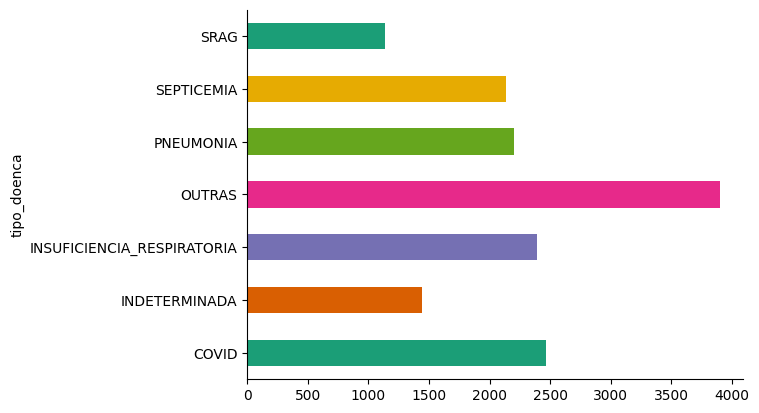

In [17]:
#Montando gráfico que mostra o tipo de doença que mais matou em 2021
obitos_df.groupby('tipo_doenca').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Gráfico que compara obitos masculinos e femininos

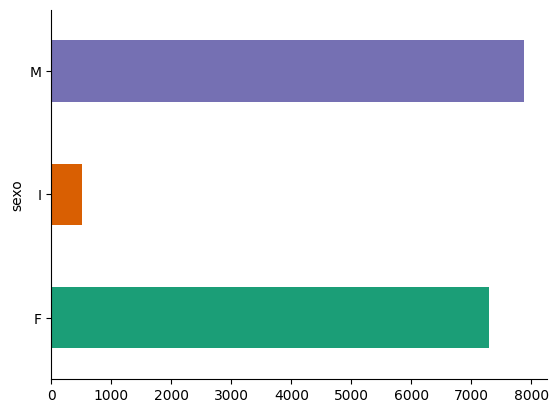

In [18]:
#Gráfico que mostra a quantidade de obitos do publico masculino e feminino
obitos_df.groupby('sexo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Teste de hipotese

In [19]:
# Agrupar os dados por sexo e somar o total de óbitos
obitos_por_sexo = obitos_df.groupby('sexo')['total'].sum()

# Separar os dados de óbitos para masculino e feminino
obitos_masculino = obitos_df[obitos_df['sexo'] == 'Masculino']['total']
obitos_feminino = obitos_df[obitos_df['sexo'] == 'Feminino']['total']

# Realizar o teste t para amostras independentes
t_statistic, p_value = stats.ttest_ind(obitos_masculino, obitos_feminino, nan_policy='omit')

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretar os resultados
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há evidências de uma diferença significativa no número total de óbitos entre homens e mulheres.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que existe uma diferença significativa no número total de óbitos entre homens e mulheres.")

T-statistic: nan
P-value: nan
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que existe uma diferença significativa no número total de óbitos entre homens e mulheres.
